# 과제 10-5장 Linear Regression - 자전거 통행량 예측

시애틀 프리몬트 다리를 지나는 자전거 통행량을 날씨와 계절, 기타 요인에 따라 예측하시오. (p436 참고)

<img src="https://images.seattletimes.com/wp-content/uploads/2020/01/01022020_bike-count_114545.jpg?d=2040x1360" width=400>

Ken Lambert, "Bike ridership hits record highs on 2 Seattle routes", The Seattle Times, Jan. 6, 2020

1. 교재에서 제공하는 FremontBridge.csv 파일과 SeattleWeather.csv 파일을 읽어 pandas 의 DataFrame 을 각각 생성하시오. (https://github.com/jakevdp/bicycle-data)

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
fremont = pd.read_csv('../../DataScienceHandbook/data/FremontBridge2.csv', index_col='Date', parse_dates=True).sort_index()
seattle = pd.read_csv('../../DataScienceHandbook/data/SeattleWeather.csv', index_col='DATE', parse_dates=True).sort_index()

C:\Users\user\AppData\Local\Temp\ipykernel_14948\3609434335.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  fremont = pd.read_csv('../../DataScienceHandbook/data/FremontBridge2.csv', index_col='Date', parse_dates=True).sort_index()


In [3]:
fremont.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0


In [4]:
fremont.index

DatetimeIndex(['2012-10-03 00:00:00', '2012-10-03 00:00:00',
               '2012-10-03 01:00:00', '2012-10-03 01:00:00',
               '2012-10-03 02:00:00', '2012-10-03 02:00:00',
               '2012-10-03 03:00:00', '2012-10-03 03:00:00',
               '2012-10-03 04:00:00', '2012-10-03 04:00:00',
               ...
               '2021-12-31 14:00:00', '2021-12-31 15:00:00',
               '2021-12-31 16:00:00', '2021-12-31 17:00:00',
               '2021-12-31 18:00:00', '2021-12-31 19:00:00',
               '2021-12-31 20:00:00', '2021-12-31 21:00:00',
               '2021-12-31 22:00:00', '2021-12-31 23:00:00'],
              dtype='datetime64[ns]', name='Date', length=147278, freq=None)

In [5]:
seattle.head()

,STATION,NAME,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,...,WT04,WT05,WT08,WT09,WT13,WT14,WT16,WT17,WT18,WT22
DATE,,,,,,,,,,,,,,,,,,,,,
2012-01-01,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",10.51,NaN,NaN,0.00,0.0,0.0,NaN,55,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2012-01-02,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",10.07,NaN,NaN,0.43,0.0,0.0,NaN,51,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2012-01-03,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",5.14,NaN,NaN,0.03,0.0,0.0,NaN,53,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2012-01-04,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",10.51,NaN,NaN,0.80,0.0,0.0,NaN,54,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2012-01-05,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",13.65,NaN,NaN,0.05,0.0,0.0,NaN,48,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [3]:
seattle.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3653 entries, 2012-01-01 to 2021-12-31
Data columns (total 28 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  3653 non-null   object 
 1   NAME     3653 non-null   object 
 2   AWND     3653 non-null   float64
 3   FMTM     31 non-null     float64
 4   PGTM     83 non-null     float64
 5   PRCP     3650 non-null   float64
 6   SNOW     3653 non-null   float64
 7   SNWD     3653 non-null   float64
 8   TAVG     3197 non-null   float64
 9   TMAX     3653 non-null   int64  
 10  TMIN     3653 non-null   int64  
 11  WDF2     3653 non-null   int64  
 12  WDF5     3615 non-null   float64
 13  WSF2     3653 non-null   float64
 14  WSF5     3615 non-null   float64
 15  WT01     1630 non-null   float64
 16  WT02     187 non-null    float64
 17  WT03     38 non-null     float64
 18  WT04     10 non-null     float64
 19  WT05     4 non-null      float64
 20  WT08     215 non-null    float64
 

2. 2020 년 이전 데이터만 선택하시오.

In [7]:
# from dateutil import parser
# fremont['Date'] = parser.parse(fremont['Date'])

In [4]:
fremont = fremont.loc[:'2019']

In [5]:
seattle = seattle.loc[:'2019']

3. 일별 총 자전거 통행량을 계산하고, 그 계산 결과를 'counts' 컬럼에 추가하시오.

In [6]:
daily = fremont.resample('d').sum()
daily = daily[['Fremont Bridge Total']]
daily = daily.rename(columns={'Fremont Bridge Total':'Total'})

In [7]:
daily

,Total
Date,
2012-10-03,7042.0
2012-10-04,6950.0
2012-10-05,6296.0
2012-10-06,4012.0
2012-10-07,4284.0
...,...
2019-12-27,2276.0
2019-12-28,1676.0
2019-12-29,1846.0


4. 월요일~일요일까지 요일을 이진 데이터로 각각 인코딩 하고, 그 결과를 요일을 나타내는 컬럼들(7개)에 추가하시오.

In [56]:
df = daily.copy()

In [26]:
df

,Total
Date,
2012-10-03,7042.0
2012-10-04,6950.0
2012-10-05,6296.0
2012-10-06,4012.0
2012-10-07,4284.0
...,...
2019-12-27,2276.0
2019-12-28,1676.0
2019-12-29,1846.0


In [57]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

encoder = OneHotEncoder(sparse_output=False)
encoder.fit_transform(df.index.dayofweek.to_numpy().reshape(-1, 1))

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [60]:
dummies = pd.get_dummies(df.index.day_name())

In [61]:
dummies.index = df.index

In [62]:
df = pd.concat([df, dummies], axis=1)

In [63]:
df

,Total,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Date,,,,,,,,
2012-10-03,7042.0,False,False,False,False,False,False,True
2012-10-04,6950.0,False,False,False,False,True,False,False
2012-10-05,6296.0,True,False,False,False,False,False,False
2012-10-06,4012.0,False,False,True,False,False,False,False
2012-10-07,4284.0,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...
2019-12-27,2276.0,True,False,False,False,False,False,False
2019-12-28,1676.0,False,False,True,False,False,False,False
2019-12-29,1846.0,False,False,False,True,False,False,False


In [16]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(7):
    daily[days[i]] = (daily.index.dayofweek == i).astype(float)

In [17]:
daily

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun
Date,,,,,,,,
2012-10-03,7042.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2012-10-04,6950.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2012-10-05,6296.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2012-10-06,4012.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2012-10-07,4284.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
2019-12-27,2276.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2019-12-28,1676.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2019-12-29,1846.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


5. 공휴일 여부를 이진 데이터로 인코딩 하고, 그 결과를 'holiday' 컬럼에 추가하시오.

In [18]:
from pandas.tseries.holiday import USFederalHolidayCalendar

cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012', '2020')

In [19]:
df['hoilday'] = df.index.isin(holidays)
df.shape

(5292, 9)

In [20]:
df

,Total,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,hoilday
0,7042.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,6950.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,6296.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,4012.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,4284.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...
5287,NaN,True,False,False,False,False,False,False,False
5288,NaN,False,False,True,False,False,False,False,False
5289,NaN,False,False,False,True,False,False,False,False
5290,NaN,False,True,False,False,False,False,False,False


In [21]:
daily['hoilday'] = ((daily['Sat'] == 1) | (daily['Sun'] == 1)) * 1

In [22]:
daily

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,hoilday
Date,,,,,,,,,
2012-10-03,7042.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
2012-10-04,6950.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
2012-10-05,6296.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2012-10-06,4012.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
2012-10-07,4284.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...
2019-12-27,2276.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2019-12-28,1676.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
2019-12-29,1846.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


6. 일자별 평균 날씨 (TAVG) 를 계산한 후, 'temp' 컬럼에 추가하시오.

In [23]:
seattle.head()

,STATION,NAME,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,...,WT04,WT05,WT08,WT09,WT13,WT14,WT16,WT17,WT18,WT22
DATE,,,,,,,,,,,,,,,,,,,,,
2012-01-01,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",10.51,NaN,NaN,0.00,0.0,0.0,NaN,55,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2012-01-02,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",10.07,NaN,NaN,0.43,0.0,0.0,NaN,51,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2012-01-03,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",5.14,NaN,NaN,0.03,0.0,0.0,NaN,53,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2012-01-04,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",10.51,NaN,NaN,0.80,0.0,0.0,NaN,54,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2012-01-05,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",13.65,NaN,NaN,0.05,0.0,0.0,NaN,48,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [24]:
seattle['TAVG'] = (seattle['TMAX'] + seattle['TMIN']) / 2

In [25]:
daily = daily.join(seattle[['TAVG', 'PRCP']])

7. 일자별 강수량(PRCP)을 계산한 후, 'rainfall' 컬럼에 추가하시오.

In [26]:
daily = daily.rename(columns={'TAVG':'temp', 'PRCP':'rainfall'})

8. 데이터에서 NA 를 제거하시오.

In [27]:
daily.dropna(how='any', inplace=True)

In [28]:
daily

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,hoilday,temp,rainfall
Date,,,,,,,,,,,
2012-10-03,7042.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,56.0,0.00
2012-10-04,6950.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,56.5,0.00
2012-10-05,6296.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,59.5,0.00
2012-10-06,4012.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,60.5,0.00
2012-10-07,4284.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,60.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,2276.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,41.0,0.01
2019-12-28,1676.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,44.0,0.00
2019-12-29,1846.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,45.5,0.01


9. LinearRegression 모델을 이용하여 자전거 통행량을 예측하시오.

In [29]:
column_names = daily.columns.values
column_names = np.delete(column_names, 0)
column_names

array(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'hoilday', 'temp',
       'rainfall'], dtype=object)

In [30]:
from sklearn.linear_model import LinearRegression
X = daily[column_names]
y = daily['Total']
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
daily['predicted'] = model.predict(X)

10. Matplotlib 를 이용하여 예측 결과를 시각화 하시오.

<Axes: xlabel='Date'>

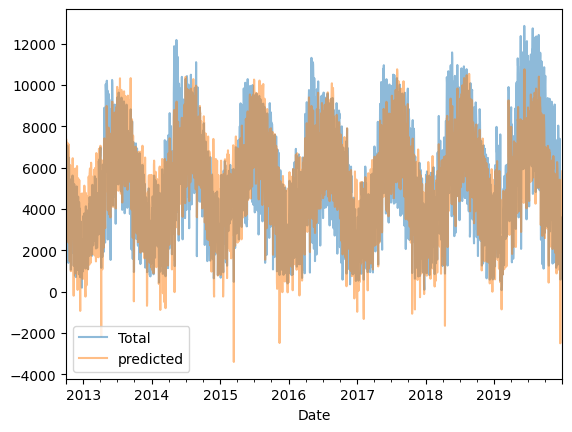

In [31]:
daily[['Total', 'predicted']].plot(alpha=0.5)

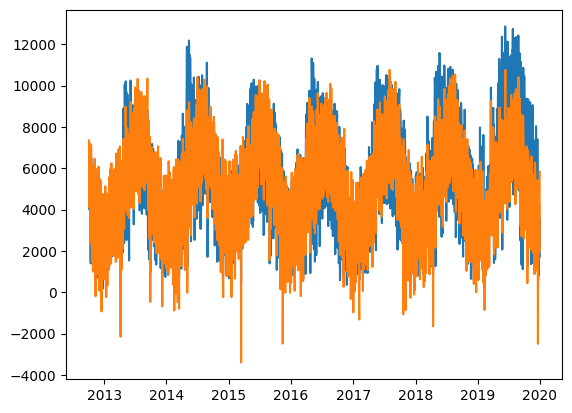

In [32]:
plt.plot(daily.index, daily['Total'])
plt.plot(daily.index, daily['predicted'])